## Successive Refinement Coding Demo

Author: Cheuk Ting Li  

In [1]:
from psitip import *
PsiOpts.setting(solver = "pyomo.glpk")     # Set linear programming solver
PsiOpts.setting(repr_latex = True)         # Jupyter Notebook LaTeX display
PsiOpts.setting(venn_latex = True)         # LaTeX in diagrams
PsiOpts.setting(proof_note_color = "blue") # Reasons in proofs are blue

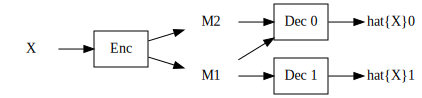

In [2]:
X, U = rv("X, U")
Xh0, Xh1, Xh2 = rv_array("\hat{X}", 3)
M1, M2 = rv_array("M", 1, 3)
R1, R2 = real_array("R", 1, 3)

# Define successive refinement coding [Equitz-Cover 1991] [Rimoldi 1994]
model = CodingModel()
model.set_rate(M1, R1)        # The rate of M1, M2 are R1, R2 resp.
model.set_rate(M2, R2)
model.add_node(X, M1+M2,      # Encoder maps X to M1,M2
    children_edge = True,     # children_edge is needed 
    label = "Enc")            #  so M2 can depend on M1
model.add_node(M1+M2, Xh0,
            label = "Dec 0")  # Decoder 0 maps M1,M2 to Xh0
model.add_node(M1, Xh1,
            label = "Dec 1")  # Decoder 1 maps M1 to Xh1

model.graph()                 # Draw diagram

In [3]:
# Automatic inner bound, recovers [Equitz-Cover 1991], [Rimoldi 1994]
r = model.get_inner()
r

( ( R2 >= 0 )
 &( R1 >= I(X&\hat{X}1) )
 &( R1+R2 >= I(X&\hat{X}0+\hat{X}1) ) )

In [4]:
# Output converse proof (is_proof = True for shorter proof)
(model.get_outer(is_proof = True) >> r).proof()

### References
- A. El Gamal and Y.-H. Kim, _Network Information Theory_, Cambridge University Press, 2011, Ch. 13.
- W. H. Equitz and T. M. Cover, "Successive refinement of information," IEEE Transactions on Information Theory, vol. 37, no. 2, pp. 269-275, 1991.
- B. Rimoldi, "Successive refinement of information: Characterization of the achievable rates," IEEE Transactions on Information Theory, vol. 40, no. 1, pp. 253-259, 1994.
